In [1]:
#comcast test
import numpy as np   
import pandas as pd
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile 
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

In [2]:
dataset = pd.read_csv('C:\Users\AG28744\Desktop\Projects\Misc\Comcast\Comcast_telecom_complaints_data.csv')
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
new_data = dataset.rename(columns = {"Customer Complaint":"Customer_Complaint"})

In [4]:
new_data['Day'] = pd.DatetimeIndex(dataset['Date_month_year']).day
new_data['Month'] = pd.DatetimeIndex(dataset['Date_month_year']).month
new_data.head()

,Ticket #,Customer_Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5


In [5]:
export_csv = new_data.to_csv (r'C:\Users\AG28744\Desktop\Projects\Misc\Comcast\Export_df2.csv', index = None, header=True)

In [6]:
#for i in new_data.Customer_Complaint:
#    print(i)

In [7]:
#new_data.Customer_Complaint[0]

In [8]:
#res=new_data.Customer_Complaint[1].split()
#len(res)

In [9]:
#print(res)

In [10]:
#a=['internet','Internet','network','Network'] #complaint types

In [11]:
#res=new_data.Customer_Complaint[0].split()
#print(res)
#m=len(res)
#print(m)

In [12]:
#res=new_data.Customer_Complaint[2].split()
#a=['internet','Internet','network','Network']
#print(res)

In [13]:
#print(res,a)

In [2]:
total_count=new_data['Customer_Complaint'].count()
j=0
a=['internet','Internet','network','Network']
a_set=set(a)
while (j<total_count):
    res=new_data.Customer_Complaint[j].split()
    b_set=set(res)
    if (a_set & b_set):
        print(a_set & b_set)
    else:
        print('others')
    j+=1
# copy paste below result into Column Complaint_Type in Export_df.csv table

NameError: name 'new_data' is not defined

In [15]:
#writing function o/p to text file
#output = out_fun()
#f = open("func_output.txt","a")
#file.write(output)
#file.close()

In [16]:
#import sys
#sys.stdout = open('output.txt','wt')
#print(a_set & b_set)
#print('others')

In [17]:
df = pd.read_csv('C:\Users\AG28744\Desktop\Projects\Misc\Comcast\Export_df.csv')

In [18]:
new_dataset = pd.read_csv('C:\Users\AG28744\Desktop\Projects\Misc\Comcast\Export_df2.csv')
new_dataset['Complaint_Type']=df.Complaint_Type
#new_dataset = new_dataset.rename(columns = {"Comlaint_Type":"Complaint_Type"})
new_dataset.head()

,Ticket #,Customer_Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Complaint_Type
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,set(['Internet'])
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,others
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,others
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,others
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,others


In [19]:
new_dataset.Complaint_Type = new_dataset.Complaint_Type.replace("set(['Internet'])" , 'Internet')

In [20]:
new_dataset.Complaint_Type = new_dataset.Complaint_Type.replace("set(['internet'])" , 'Internet')

In [21]:
new_dataset.Complaint_Type = new_dataset.Complaint_Type.replace("set(['network'])" , 'Network')

In [22]:
new_dataset.Complaint_Type = new_dataset.Complaint_Type.replace("set(['Network'])" , 'Network')

In [23]:
new_dataset.head()

,Ticket #,Customer_Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Complaint_Type
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,Internet
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,others
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,others
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,others
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,others


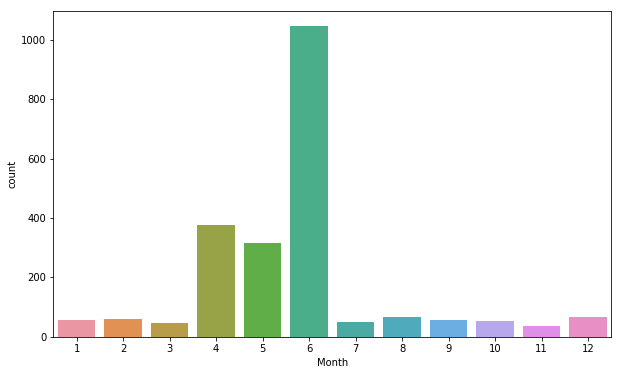

In [24]:
plt.figure(figsize=(10,6))            #number of complaints at monthly level
sns.countplot(x='Month', data=new_dataset)

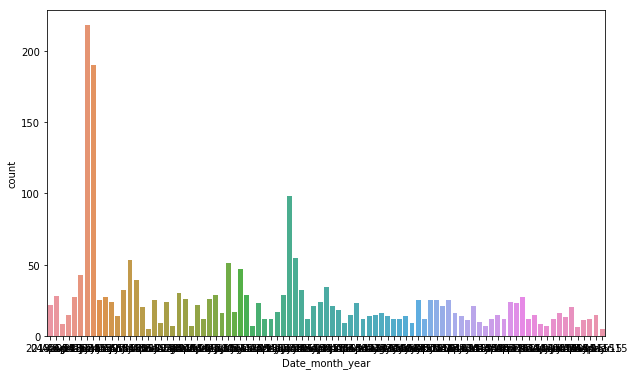

In [25]:
plt.figure(figsize=(10,6))            #number of complaints at daily level
sns.countplot(x='Date_month_year', data=new_dataset)

In [26]:
new_dataset.groupby('Complaint_Type').count()  #frequency of complaint types

,Ticket #,Customer_Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month
Complaint_Type,,,,,,,,,,,,,
Internet,496,496,496,496,496,496,496,496,496,496,496,496,496
Network,2,2,2,2,2,2,2,2,2,2,2,2,2
others,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726


In [27]:
from scipy import stats             #maximum complaint type
n=stats.mode(new_dataset_table.Complaint_Type)
print(n[0])  

NameError: name 'new_dataset_table' is not defined

In [ ]:
#new_dataset.Status.head(20)

In [29]:
New_Status=new_dataset.Status.replace({'Pending':'Open','Solved':'Closed'})
new_dataset['New_Status'] = New_Status

In [30]:
new_dataset

,Ticket #,Customer_Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Complaint_Type,New_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,Internet,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,others,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,others,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,others,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,others,Closed
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,6,12,others,Closed
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,24,6,others,Open
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,23,6,others,Closed
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,6,1,others,Closed
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,28,6,others,Open


In [31]:
new_dataset_table=new_dataset
grouped = new_dataset_table.groupby(['State','New_Status']) 
grouped.size()  # State wise status of complaints in a stacked bar chart

State                 New_Status
Alabama               Closed         17
                      Open            9
Arizona               Closed         14
                      Open            6
Arkansas              Closed          6
California            Closed        159
                      Open           61
Colorado              Closed         58
                      Open           22
Connecticut           Closed          9
                      Open            3
Delaware              Closed          8
                      Open            4
District Of Columbia  Closed         14
                      Open            2
District of Columbia  Closed          1
Florida               Closed        201
                      Open           39
Georgia               Closed        208
                      Open           80
Illinois              Closed        135
                      Open           29
Indiana               Closed         50
                      Open            9
Iowa   

In [106]:
stack_bar_table = pd.crosstab(index=new_dataset_table['State'], columns=new_dataset_table['New_Status'])

stack_bar_table

New_Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


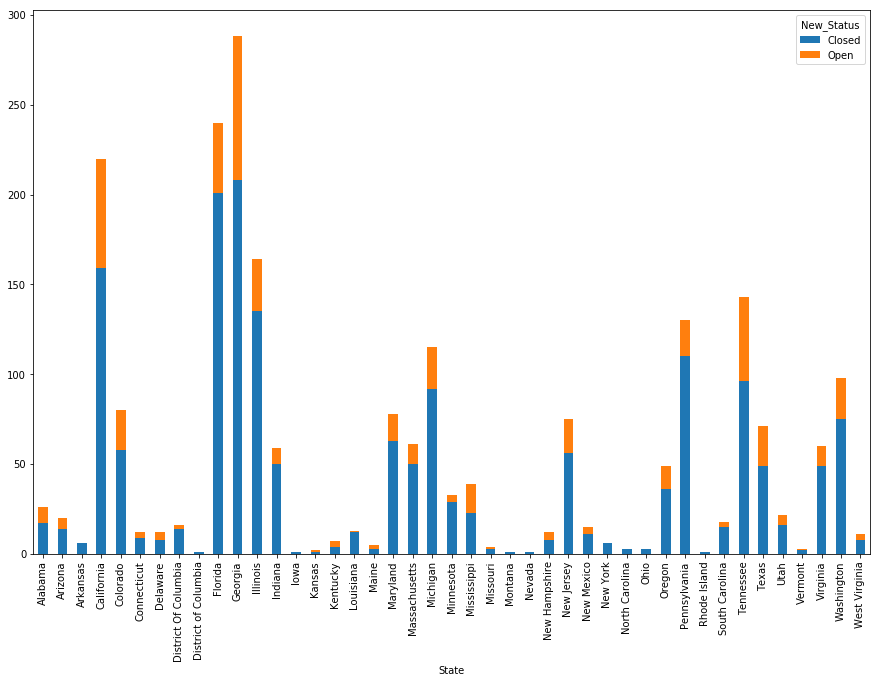

In [33]:
stack_bar_table.plot(kind="bar",figsize=(15,10),stacked=True)
# State wise status of complaints in a stacked bar chart

In [34]:
months=[7,8,9]
new_dataset_table.Month.isin(months)
new_dataset_table_Q3=new_dataset[new_dataset.Month.isin(months)]
new_dataset_table_Q3  #where columns in (7,8,9) or Q3 

,Ticket #,Customer_Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Complaint_Type,New_Status
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,others,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,others,Open
20,327657,Internet out all the time but they have a mono...,06-07-15,06-Jul-15,8:55:43 PM,Customer Care Call,Alexandria,Virginia,22305,Solved,No,6,7,Internet,Closed
21,328742,horrible cable service and customer service,06-08-15,06-Aug-15,3:18:58 PM,Internet,Alexandria,Virginia,22312,Solved,No,6,8,others,Closed
22,328165,Speed,06-08-15,06-Aug-15,12:03:37 PM,Customer Care Call,Alexandria,Virginia,22304,Solved,No,6,8,others,Closed
43,223179,Comcast bandwidth every evening drops to 10% o...,04-08-15,04-Aug-15,1:04:24 AM,Internet,Angels Camp,California,95222,Closed,No,4,8,others,Closed
56,227209,Comcast credit after cancellation has not been...,04-09-15,04-Sep-15,4:40:05 PM,Customer Care Call,Arlington,Virginia,22202,Closed,No,4,9,others,Closed
66,226231,Issues with Xfinity/Comcast,04-09-15,04-Sep-15,12:24:32 PM,Customer Care Call,Arlington Heights,Illinois,60004,Closed,No,4,9,others,Closed
69,223960,Speed issues,04-08-15,04-Aug-15,12:53:45 PM,Internet,Ashland,Virginia,23005,Closed,No,4,8,others,Closed
82,278509,Data caps,05-07-15,05-Jul-15,2:55:45 PM,Internet,Atlanta,Georgia,30363,Open,No,5,7,others,Open


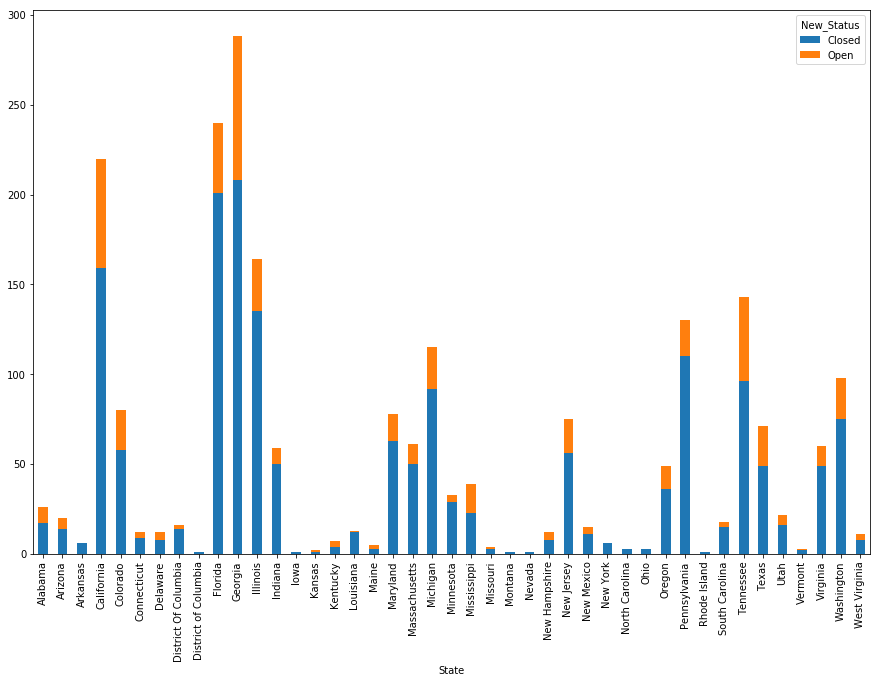

In [35]:
stack_bar_table = pd.crosstab(index=new_dataset_table['State'], columns=new_dataset_table['New_Status'])
stack_bar_table.plot(kind="bar",figsize=(15,10),stacked=True) # for Q3

In [36]:
from scipy import stats             #state has the maximum complaints
m=stats.mode(new_dataset_table.State)
print(m[0])

['Georgia']


C:\ProgramData\Anaconda2\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [37]:
new_table=new_dataset.groupby(['State','New_Status']).count()
new_table

Ticket #  Customer_Complaint  Date  \
State                New_Status                                       
Alabama              Closed            17                  17    17   
                     Open               9                   9     9   
Arizona              Closed            14                  14    14   
                     Open               6                   6     6   
Arkansas             Closed             6                   6     6   
California           Closed           159                 159   159   
                     Open              61                  61    61   
Colorado             Closed            58                  58    58   
                     Open              22                  22    22   
Connecticut          Closed             9                   9     9   
                     Open               3                   3     3   
Delaware             Closed             8                   8     8   
                     Open               4                   4     4   
District Of Columbia Closed            14                  14    14   
                     Open               2                   2     2   
District of Columbia Closed             1                   1     1   
Florida              Closed           201                 201   201   
                     Open              39                  39    39   
Georgia              Closed           208                 208   208   
                     Open              80                  80    80   
Illinois             Closed           135                 135   135   
                     Open              29                  29    29   
Indiana              Closed            50                  50    50   
                     Open               9                   9     9   
Iowa                 Closed             1                   1     1   
Kansas               Closed             1                   1     1   
                     Open               1                   1     1   
Kentucky             Closed             4                   4     4   
                     Open               3                   3     3   
Louisiana            Closed            12                  12    12   
...                                   ...                 ...   ...   
New Hampshire        Closed             8                   8     8   
                     Open               4                   4     4   
New Jersey           Closed            56                  56    56   
                     Open              19                  19    19   
New Mexico           Closed            11                  11    11   
                     Open               4                   4     4   
New York             Closed             6                   6     6   
North Carolina       Closed             3                   3     3   
Ohio                 Closed             3                   3     3   
Oregon               Closed            36                  36    36   
                     Open              13                  13    13   
Pennsylvania         Closed           110                 110   110   
                     Open              20                  20    20   
Rhode Island         Closed             1                   1     1   
South Carolina       Closed            15                  15    15   
                     Open               3                   3     3   
Tennessee            Closed            96                  96    96   
                     Open              47                  47    47   
Texas                Closed            49                  49    49   
                     Open              22                  22    22   
Utah                 Closed            16                  16    16   
                     Open               6                   6     6   
Vermont              Closed             2                   2     2   
                     Open               1                

In [38]:
#new_table.New_Status 
list(new_table.columns.values) 

['Ticket #',
 'Customer_Complaint',
 'Date',
 'Date_month_year',
 'Time',
 'Received Via',
 'City',
 'Zip code',
 'Status',
 'Filing on Behalf of Someone',
 'Day',
 'Month',
 'Complaint_Type']

In [39]:
total_status=new_table.groupby('State').sum()
total_status

,Ticket #,Customer_Complaint,Date,Date_month_year,Time,Received Via,City,Zip code,Status,Filing on Behalf of Someone,Day,Month,Complaint_Type
State,,,,,,,,,,,,,
Alabama,26,26,26,26,26,26,26,26,26,26,26,26,26
Arizona,20,20,20,20,20,20,20,20,20,20,20,20,20
Arkansas,6,6,6,6,6,6,6,6,6,6,6,6,6
California,220,220,220,220,220,220,220,220,220,220,220,220,220
Colorado,80,80,80,80,80,80,80,80,80,80,80,80,80
Connecticut,12,12,12,12,12,12,12,12,12,12,12,12,12
Delaware,12,12,12,12,12,12,12,12,12,12,12,12,12
District Of Columbia,16,16,16,16,16,16,16,16,16,16,16,16,16
District of Columbia,1,1,1,1,1,1,1,1,1,1,1,1,1


In [93]:
stack_bar_table

New_Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


In [94]:
import warnings
warnings.filterwarnings("ignore")

In [103]:
stack_bar_table['per']=stack_bar_table.Open/(stack_bar_table.Open+stack_bar_table.Closed)*100
stack_bar_table_per=stack_bar_table
stack_bar_table_per

New_Status,Closed,Open,per
State,,,
Alabama,17,9,34.615385
Arizona,14,6,30.000000
Arkansas,6,0,0.000000
California,159,61,27.727273
Colorado,58,22,27.500000
Connecticut,9,3,25.000000
Delaware,8,4,33.333333
District Of Columbia,14,2,12.500000
District of Columbia,1,0,0.000000


In [104]:
unresolved_max_percent=stack_bar_table_per.per.max()
unresolved_max_percent

50.0

In [105]:
stack_bar_table_op = stack_bar_table_per[(stack_bar_table_per['per']==unresolved_max_percent)]
stack_bar_table_op # State with highest percentage of unresolved complaints

New_Status,Closed,Open,per
State,,,
Kansas,1,1,50.0


In [107]:
stack_bar_table

New_Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


In [136]:
#percentage of complaints resolved till date, which were received through the Internet and customer care calls
per_complnt_reslvd=float(stack_bar_table.Closed.sum())/(stack_bar_table.Closed.sum()+stack_bar_table.Open.sum())*100
per_complnt_reslvd

76.75359712230215